In [79]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns

#load data
df = pd.read_csv('text_preprocessing/final_dataset.csv')
df

,Sentiment,tweet_tokens_stemmed
0,positive,"['undang', 'shanijkt', 'hitamputih', 'pemenang..."
1,positive,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama..."
2,positive,"['trans', 'hitam', 'putih', 'penghargaan', 'no..."
3,positive,"['selamat', 'hitamputih']"
4,positive,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']"
...,...,...
395,negative,"['banget', 'kesel', 'debat', 'pake', 'emosi', ..."
396,negative,"['miskin', 'miskin', 'sekolah', 'pungutan', 'l..."
397,negative,"['emosi', 'cepat', 'tua', 'nonton', 'emosi', '..."
398,negative,"['penampilan', 'kyk', 'preman', 'taunya', 'bki..."


index: Index(['positive', 'negative'], dtype='object', name='Sentiment')
values: [200 200]
all_values: 400


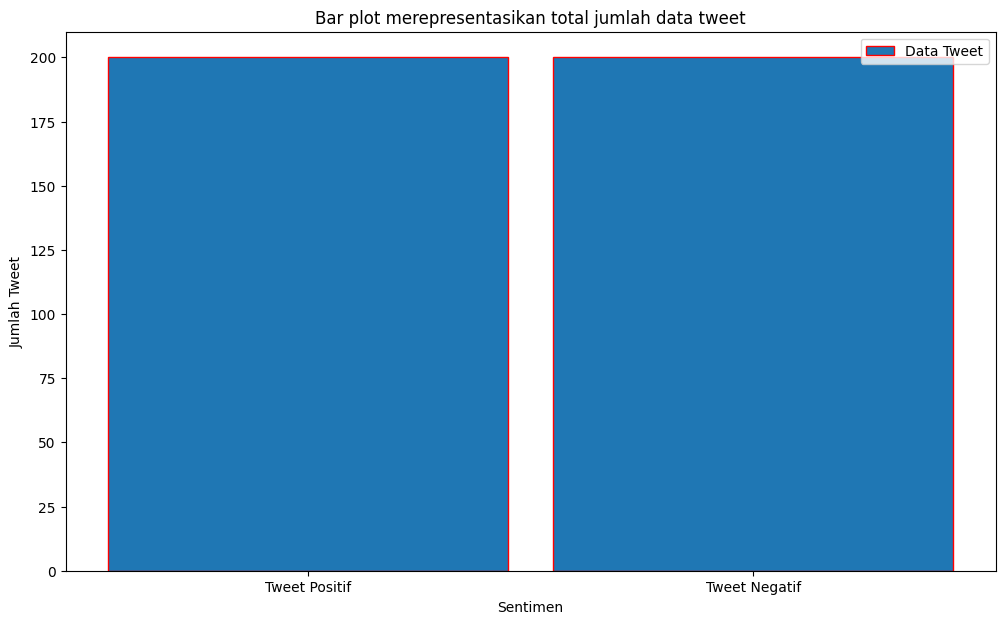

In [42]:
#visualisasi data
tweet_bar_df = df['Sentiment'].value_counts()
print(f'index: {tweet_bar_df.index}')
print(f'values: {tweet_bar_df.values}')
print(f'all_values: {tweet_bar_df.sum()}')

plt.figure(figsize=(12, 7))
sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)
i = 1.0
j = 30
for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))
plt.legend(labels = ['Data Tweet'])
plt.title("Bar plot merepresentasikan total jumlah data tweet")
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

In [57]:
#konversi sentimen positif =1 negatif= 0
def convert_label_sentimen(label_sentimen):
    if label_sentimen == "positive":
        return 1
    else:
        return 0

df['label_sentimen'] = df['Sentiment'].apply(convert_label_sentimen)
df.shape
df

,Sentiment,tweet_tokens_stemmed,label_sentimen
0,positive,"['undang', 'shanijkt', 'hitamputih', 'pemenang...",1
1,positive,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama...",1
2,positive,"['trans', 'hitam', 'putih', 'penghargaan', 'no...",1
3,positive,"['selamat', 'hitamputih']",1
4,positive,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']",1
...,...,...,...
395,negative,"['banget', 'kesel', 'debat', 'pake', 'emosi', ...",0
396,negative,"['miskin', 'miskin', 'sekolah', 'pungutan', 'l...",0
397,negative,"['emosi', 'cepat', 'tua', 'nonton', 'emosi', '...",0
398,negative,"['penampilan', 'kyk', 'preman', 'taunya', 'bki...",0


In [58]:
df.drop(df.columns[[0]], axis= 1,inplace=True)
df

,tweet_tokens_stemmed,label_sentimen
0,"['undang', 'shanijkt', 'hitamputih', 'pemenang...",1
1,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama...",1
2,"['trans', 'hitam', 'putih', 'penghargaan', 'no...",1
3,"['selamat', 'hitamputih']",1
4,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']",1
...,...,...
395,"['banget', 'kesel', 'debat', 'pake', 'emosi', ...",0
396,"['miskin', 'miskin', 'sekolah', 'pungutan', 'l...",0
397,"['emosi', 'cepat', 'tua', 'nonton', 'emosi', '...",0
398,"['penampilan', 'kyk', 'preman', 'taunya', 'bki...",0


In [70]:
df['label_sentimen'].value_counts()

label_sentimen
1    200
0    200
Name: count, dtype: int64

In [60]:
#k-fold cross validation(spliting data)
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_idx, val_idx in kfold.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

In [62]:
#klasifikasi
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predict = mnb.predict(X_test)
print(predict)

['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'posit

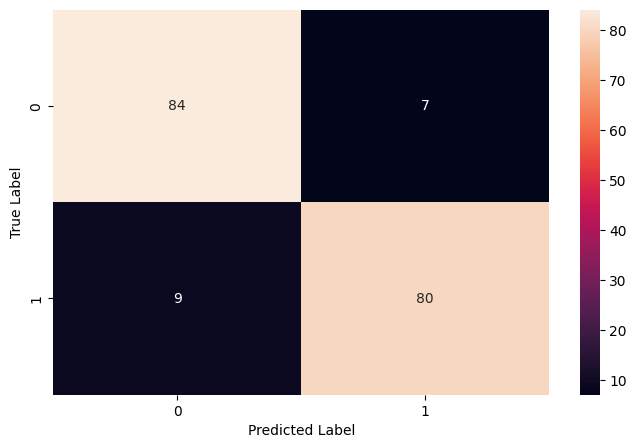

In [63]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [69]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
91.11111111111111


BERNOULLI NAIVE BAYES

In [75]:
#klasifikasi
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
predict = bnb.predict(X_test)
print(predict)

['negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'posit

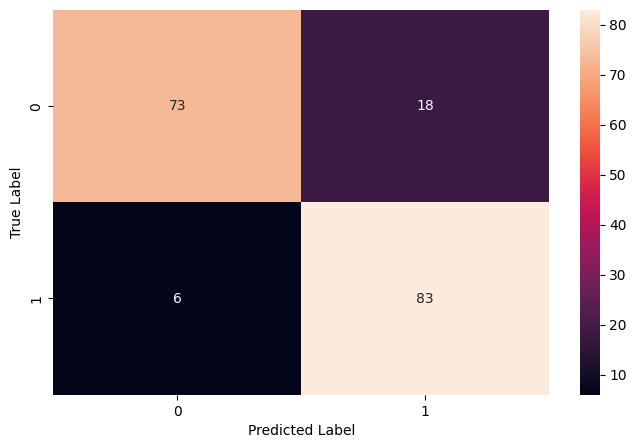

In [76]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
86.66666666666667


GAUSSIAN NAIVE BAYES

In [85]:
#klasifikasi
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)
predict = gnb.predict(X_test_dense)
print(predict)

['negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'posit

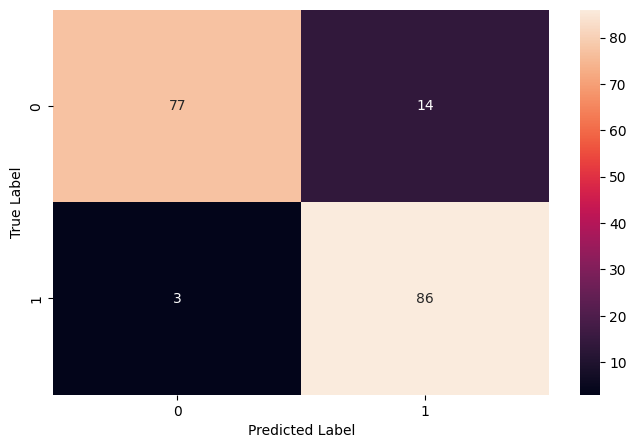

In [86]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
90.55555555555556
